# KNN ( K nearest neighbors classification)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'C:\Users\OM\program by om unde\Machine Learning Practice\Datasets\Iris.csv')

In [3]:
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
target= df['Species']
inputs = df.drop('Species',axis='columns')

In [9]:
# Here we created a target attribute column that defines the number according to Species
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the Iris dataset
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'species' column and transform it to numerical values
df['target'] = label_encoder.fit_transform(df['Species'])

# Increment the encoded values by 1 to match your desired mapping (1 for 'Iris-setosa', 2 for 'Iris-versicolor', 3 for 'Iris-virginica')
df['target'] += 1

# Display the modified DataFrame
df.head(70)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
65,66,6.7,3.1,4.4,1.4,Iris-versicolor,2
66,67,5.6,3.0,4.5,1.5,Iris-versicolor,2
67,68,5.8,2.7,4.1,1.0,Iris-versicolor,2
68,69,6.2,2.2,4.5,1.5,Iris-versicolor,2


In [10]:
# Now here we divided the datasets according to the target's 
df0 = df[df.target==1]
df1= df[df.target==2]
df2 = df[df.target==3]

In [11]:
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
100,101,6.3,3.3,6.0,2.5,Iris-virginica,3
101,102,5.8,2.7,5.1,1.9,Iris-virginica,3
102,103,7.1,3.0,5.9,2.1,Iris-virginica,3
103,104,6.3,2.9,5.6,1.8,Iris-virginica,3
104,105,6.5,3.0,5.8,2.2,Iris-virginica,3


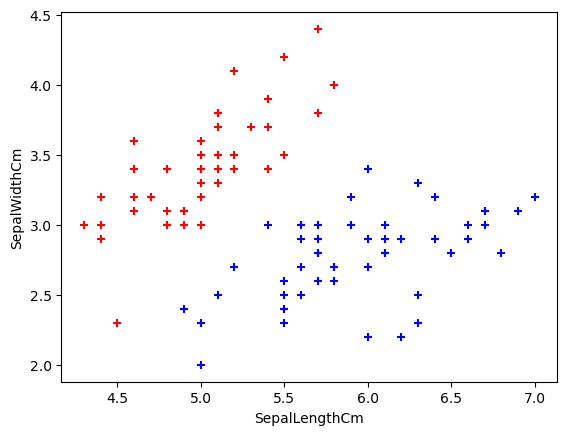

In [12]:
# Now we will plot a graph based on the target using 2 variables only because it is a 2D Array that 'SepalLengthCm' and 'SepalWidthCm'
# %matplotlib inline
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(df0['SepalLengthCm'],df0['SepalWidthCm'], color='red',marker='+')
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'], color='blue',marker='+')

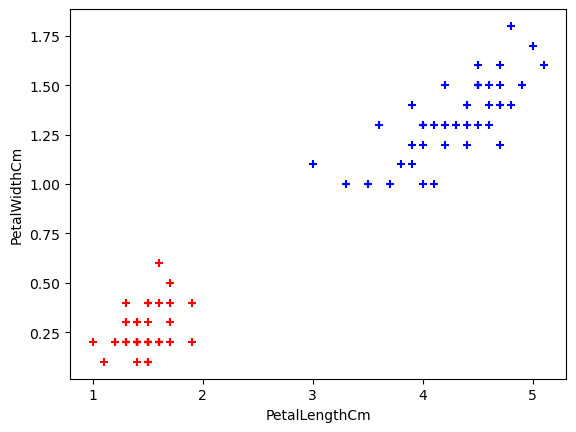

In [13]:
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.scatter(df0['PetalLengthCm'],df0['PetalWidthCm'], color='red',marker='+')
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'], color='blue',marker='+')

In [14]:
df_n=pd.get_dummies(df['Species'])
df = pd.concat([df, df_n], axis=1)

In [15]:
from sklearn.model_selection import train_test_split
x = df.drop(['target','Species'], axis=1)
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


In [16]:
y=df.target

In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int32

In [18]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.4)

In [21]:
model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 1, 1, 2, 3, 1, 3,
       3, 1, 3, 2, 2, 3, 3, 1, 3, 3, 2, 1, 3, 3, 1, 2, 2, 3, 1, 2, 3, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 3, 2, 2])

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
y_pred=knn.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm = classification_report(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.95      1.00      0.97        18
           3       1.00      0.96      0.98        26

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



In [27]:
knn.score(x_test,y_test)

0.9833333333333333